### Empirical Example Two for RobustiPy!

#### This example is designed to show how the LRobust class can be used to estimate a model with a binary dependent variable.

[The dataset](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) provides insights into customer satisfaction levels within an undisclosed airline company. While the specific airline name is withheld, the dataset is rich in information, containing 22 columns and 129,880 rows. It aims to predict whether future customers will be satisfied based on various parameters included in the dataset.

The columns likely cover a range of factors that influence customer satisfaction, such as flight punctuality, service quality, and so. By analyzing this dataset, airlines can gain valuable insights into the factors that contribute to customer satisfaction and tailor their services accordingly to enhance the overall customer experience.

The dataset is provided under an Apache 2.0 license.

Let's first load the libraries that we'll need:

In [1]:
import os
import pandas as pd
from robustipy.models import LRobust

Then, let's do a little bit of cleaning of the dataset:

In [2]:
def clean_airline():
    df = pd.read_csv(os.path.join(os.getcwd(), 'data', 'input', 'airline.csv'))
    df['satisfaction'] = pd.get_dummies(df['satisfaction'])['satisfied']
    df = df.dropna().reset_index()
    return df
    
airline_df = clean_airline()

Lets ahve a quick look at the data:

In [3]:
airline_df.head(5)

,index,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,True,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,True,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,2,True,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,3,True,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,4,True,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Next, let's define our key variables as before: 

In [4]:
y = ['satisfaction']
x = ['Age']
c = ['Flight Distance',
     'Seat comfort', 
     'Food and drink',
     'Gate location',
     'On-board service',
     'Leg room service',
     'Baggage handling',
     #'Checkin service', 'Cleanliness'
    ]

Now, lets do some RobustiPy things:

In [5]:
# Lets call the LRobust class, similar but different to the example_one_union.ipynb
airline_robust = LRobust(y=y, x=x, data=airline_df)

# Now, lets 'fit' the model and vary over the controls
airline_robust.fit(controls=c,
                   draws=1000,
                   oos_metric='r-squared',
                   kfold=10,
                  )

# Finally, get the results object that we'll need to visualise and print out the results:
airline_results = airline_robust.get_results()

Output()

Visualise the results:

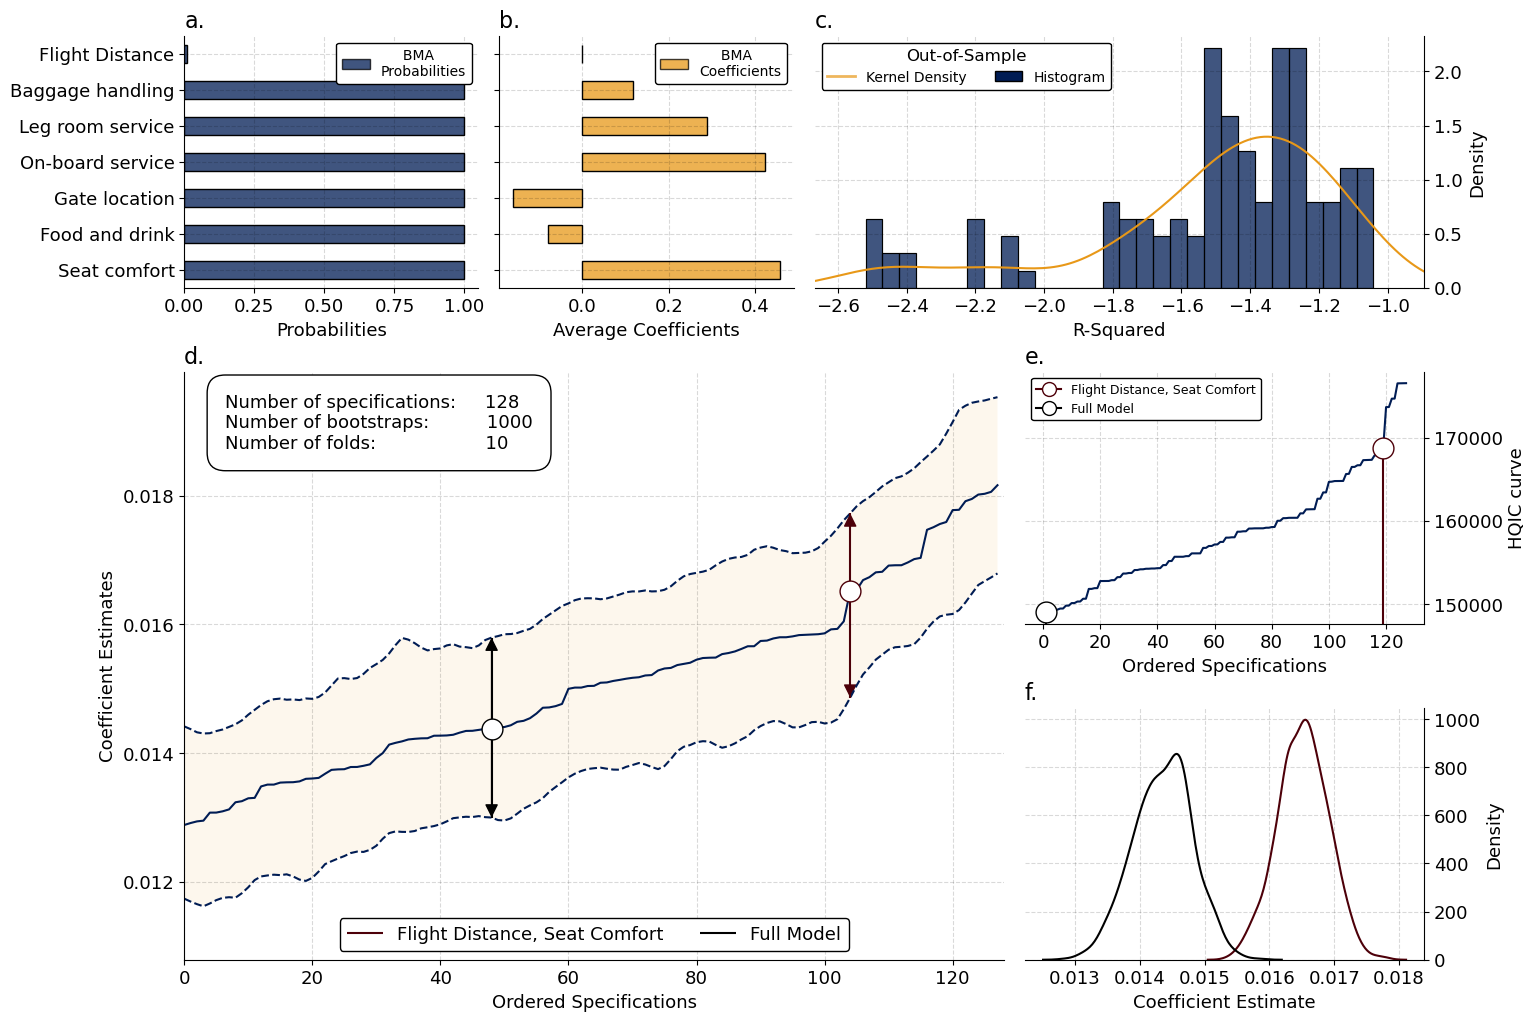

In [6]:
airline_results.plot(ic='hqic',
                    figsize=(16, 12),
                    specs=[['Flight Distance', 'Seat comfort']]
                    )

Print out a summary of the results:

In [7]:
airline_results.summary()

1. Model Summary
Model: Logistic Regression Robust
Dependent variable: satisfaction
Independent variable: ['Age']
Number of possible controls: 7
Number of draws: 1000
Number of folds: 10
Number of specifications: 128
2.Model Robustness Metrics
2.1 Inference Metrics
------------------------------------------------------------------------------------------------------------
Mean beta: 0.02
Significant portion of beta: 1.00
Positive portion of beta: 1.00
Positive and Significant portion of beta: 1.00
Min AIC: 407925.8904805045, Specs: ['Flight Distance', 'Seat comfort', 'Baggage handling', 'Gate location', 'Food and drink', 'Leg room service', 'On-board service']
Min BIC: 149048.28254899973, Specs: ['Seat comfort', 'Baggage handling', 'Gate location', 'Leg room service', 'Food and drink', 'On-board service']
Min HQIC: 148993.56254131388, Specs: ['Seat comfort', 'Baggage handling', 'Gate location', 'Leg room service', 'Food and drink', 'On-board service']
----------------------------------